## Introdução

O dataset que escolhemos foi “Suicide Rates Overview 1985 to 2016” e o nosso
objetivo é observar como os atributos presentes neste dataset e as relações entre eles têm
impacto no atributo suicides_no (número de suicídios). Assim, para efetuar esta análise,
usamos o ambiente miniconda.

In [105]:
'''import libraries'''
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from
klearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

SyntaxError: invalid syntax (2961267147.py, line 7)

## Análise dos dados


### Descrição dos atributos
De forma a perceber a melhor forma de abordar o problema, começamos por
analisar as features do dataset, Assim, podemos verificar que o dataset é composto pelos
seguintes atributos:
* **country**: variável do tipo string que identifica o país analisado.
* **year**: variável do tipo int que representa o ano correspondente ao levantamento dos dados.
* **sex**: variável do tipo string que define o sexo das pessoas que cometeram suicídio.
* **age**: variável do tipo string que representa a faixa etária dos individuos que cometeram suicídio.
* **suicides_no**: variável do tipo int que corresponde ao número de suicídios ocorridos.
* **population**: variável do tipo int que define a população de um determinado país num determinado ano.
* **suicides/100k pop**: variável do tipo double que corresponde ao número de suicídios por cada 100 mil habitantes .
* **country-year**: variável do tipo string que representa o país e o ano correspondente ao levantamento de dados .
* **HDI for year**: variável do tipo double que corresponde ao índice de desenvolvimento humano.
* **gdp_for_year**: variável do tipo string que representa o grau de desenvolvimento de um país num determinado ano
* **gdp_per_capita**: variável do tipo inteiro que representa o grau de desenvolvimento de um país per capita.
* **generation**: variável do tipo string que representa a geração do conjunto de pessoas que cometeram suicidio.



In [ ]:
'''Load CSV'''
df = pd.read_csv('master.csv')

In [ ]:
''''''
df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita ($),generation,country(to number)
0,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X,1
1,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent,1
2,1987,female,15-24 years,14,289700,4.83,NaN,2156624900,796,Generation X,1
3,1987,male,75+ years,1,21800,4.59,NaN,2156624900,796,G.I. Generation,1
4,1987,male,25-34 years,9,274300,3.28,NaN,2156624900,796,Boomers,1


In [ ]:
df.tail()

In [ ]:
df.info()
#Descreve os tipos dos respetivos atributos e conta o número de valores não NULL

#Como podemos observar no output apenas 8364 das 27820 não são valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year        27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  country(to number)  27820 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.3+ MB


In [ ]:
print(df.isna().sum())
# Tal como em cima confirmamos aqui verificamos 19456 entradas nulas 
# no atributo 'HDI for year'

In [ ]:
# Contar o número de registos repetidos
print(df['country'].duplicated().sum())

In [ ]:
df['HDI for year'].value_counts()

In [ ]:
df['HDI for year'].describe()

Axes(0.125,0.11;0.775x0.77)


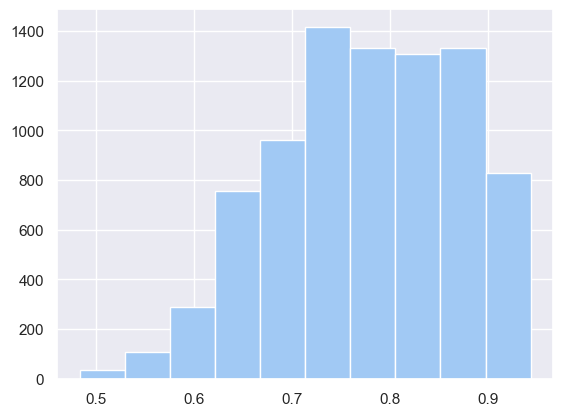

In [108]:
print(df['HDI for year'].hist())

In [109]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')


: 

In [ ]:
print(f"Skewness: {df['HDI for year'].skew()}")
print(f"Kurtosis: {df['HDI for year'].kurt()}")

In [ ]:
sns.boxplot(y='HDI for year',data=df,palette='winter')

'''
country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'
'''

In [ ]:
#df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].mean())

In [ ]:
print(df['HDI for year'].hist())

In [ ]:

'''
Rename complicated columns' names
'''  
df.rename(columns={" gdp_for_year ($) ": "gdp_for_year"}, inplace=True)
df.info()


In [ ]:
df["gdp_for_year"] = df["gdp_for_year"].replace(",", "", regex=True)


In [ ]:
df["gdp_for_year"] = df["gdp_for_year"].astype("int64")
print(df)

In [ ]:
"""
Replace each country with a number
"""

country_to_number = {}
unique_countries = df['country'].unique()

for i in range(len(unique_countries)):
    country_to_number[unique_countries[i]] = i + 1

# Adicione a coluna "country(to number)" ao DataFrame usando o mapeamento
df['country(to number)'] = df['country'].map(country_to_number)

# Exiba o DataFrame resultante
print(df)


In [ ]:
"""
Remove as colunas country-year e country
"""
df = df.drop(['country-year','country'], axis=1)

In [ ]:
#Fazer cópia
df_copy1 = df.copy()

In [ ]:
# Eliminar a coluna "HDI for year"
df_copy1 = df_copy1.dropna()
df_copy1.info()

## Treino de um Modelo de Regressão Linear

In [ ]:
X = df_copy1[['year','suicides/100k pop','gdp_for_year','gdp_per_capita ($)','country(to number)']]
y = df_copy1['suicides_no']

### Separação dos dados de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=2023)
#X_train = X_train.drop(['sex','age','population','generation'],axis=1)
#X_test = X_test.drop(['sex','age','population','generation'],axis=1)

### Criação e treino do Modelo

In [ ]:
#Treino
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

### Avaliação do Modelo

In [ ]:
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn import metrics


print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:", metrics.mean_squared_error(y_test,predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))


In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
sns.histplot((y_test-predictions),bins=100);

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
print("With 'newton-cg': \n", classification_report(y_test,predictions))
#print("With 'lbfgs': \n", classification_report(y_test,predictions2))
#print("With 'liblinear': \n", classification_report(y_test,predictions3))

In [ ]:
df.columns

In [ ]:
print(df['HDI for year'].hist())

<Axes: >

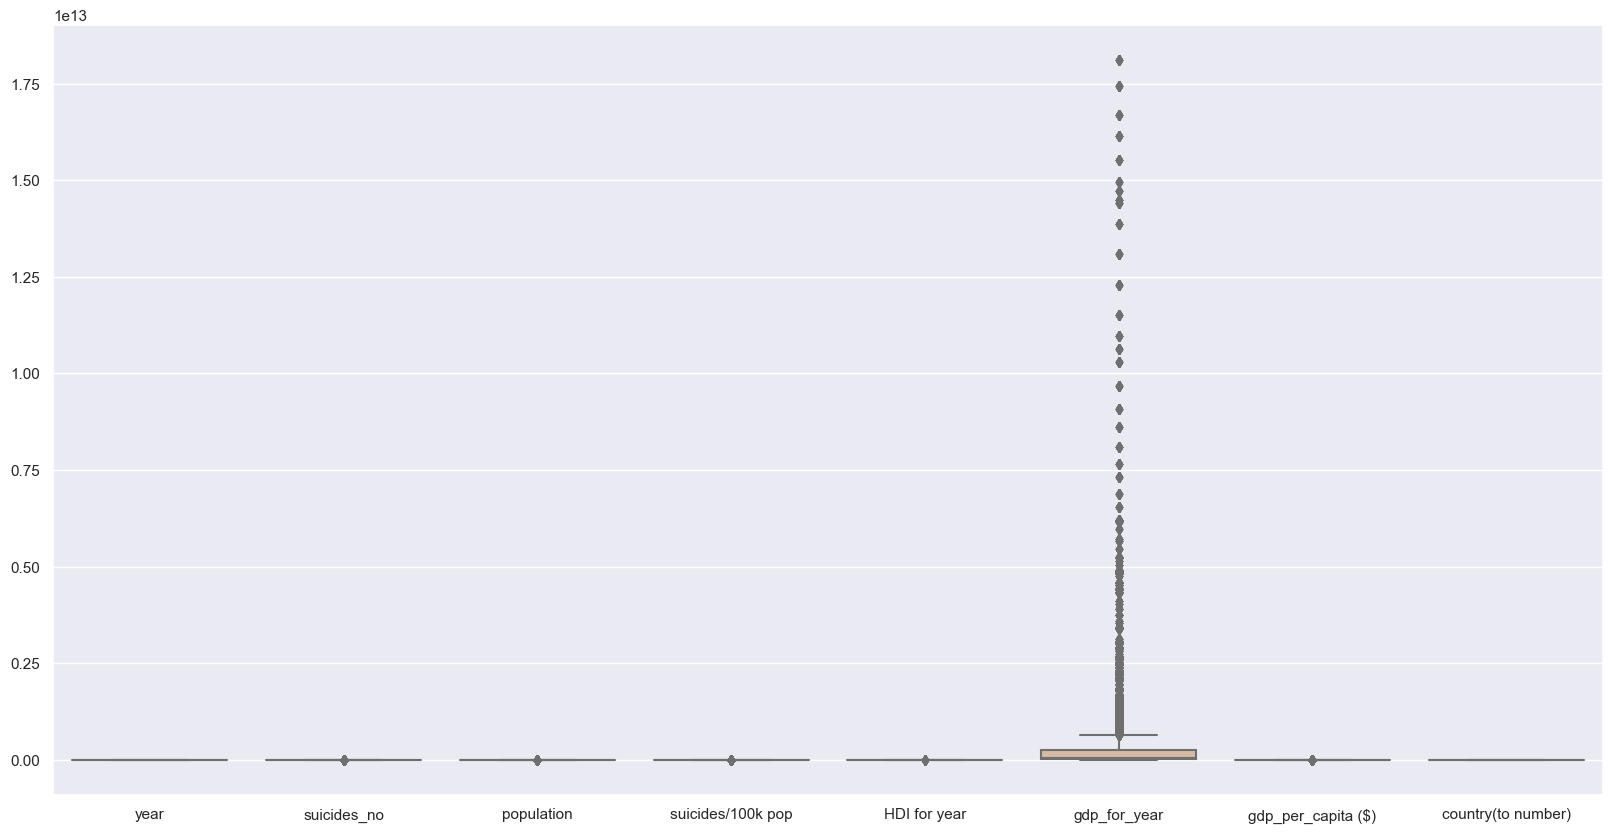

In [ ]:
"""
Tratamento dos Outliers
"""

# Outliers boxplot
sns.set_theme(palette="pastel")
plt.subplots(figsize=(20,10))

sns.boxplot(data=df)

In [ ]:
df.columns

In [ ]:
'''Dados em Falta'''
df.isna().any()

In [ ]:
df.shape
#output:  (linhas, colunas)